In [39]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [40]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
# from this data FWI will be the dependent feature
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [41]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [42]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [43]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [45]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [46]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [47]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [48]:
# seperating the dependent and independent feature
x = df.drop('FWI',axis=1) #dependent feature
y = df['FWI']

In [49]:
# spliting the train and test data 
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [13]:
x_train.shape

(182, 11)

In [14]:
x_test.shape

(61, 11)

## Feature selection based on correlation

In [51]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

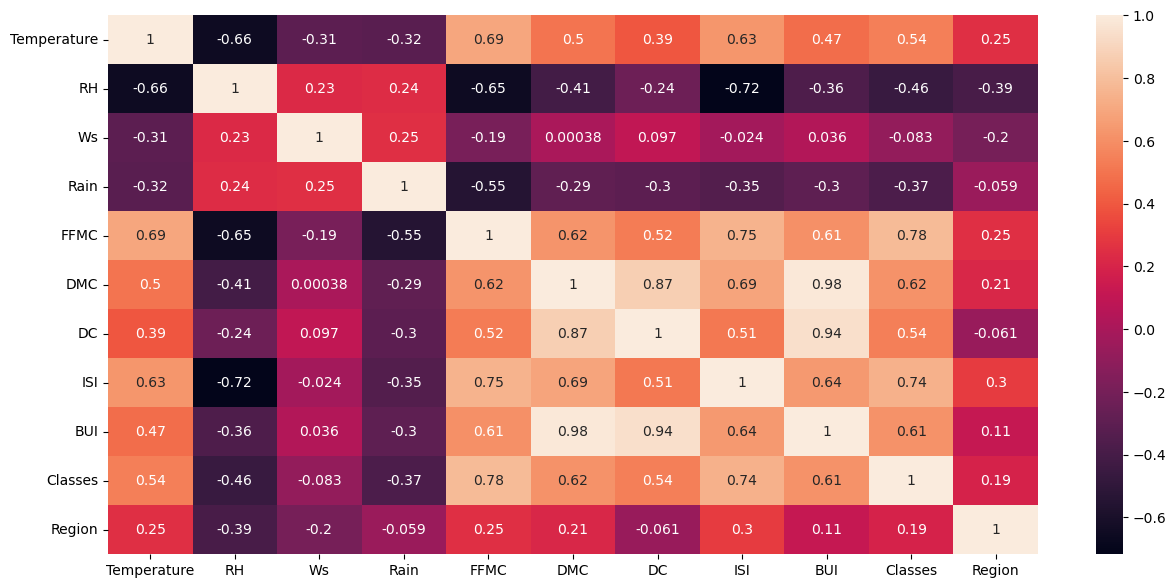

In [52]:

plt.figure(figsize=(15,7))
sns.heatmap(x_train.corr(),annot=True)

Multicollinearity means that two or more independent (predictor) variables in a regression model are highly correlated with each other

In [55]:
x_train


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


np.float64(-0.6560952065209626)

In [97]:
# checking multicolinearity
def correlation(dataset,threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [98]:
cor_feature =correlation(x_train,0.85)
cor_feature

{'BUI', 'DC'}

In [99]:
# this freature are highly correlated
# so we are dropping this features because there correlation is more than 0.85
x_train.drop(cor_feature,axis=1,inplace=True)
x_test.drop(cor_feature,axis=1,inplace=True)

In [20]:
x_train.shape

(182, 9)

## Feature scaling or standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [22]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [23]:
x_test_scaled.shape

(61, 9)

In [24]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box plot to understand the effect of Standard Scalar

Text(0.5, 1.0, 'X_train after scaling')

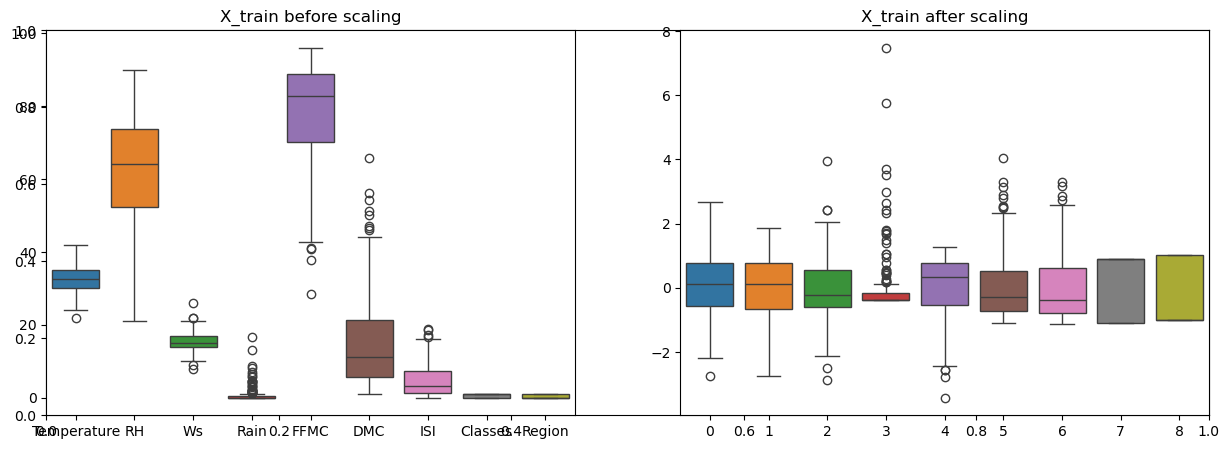

In [25]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('X_train before scaling')
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train after scaling')

## Linaer regression model



In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [27]:
linear_regression = LinearRegression()

In [28]:
linear_regression.fit(x_train_scaled,y_train)
y_predict = linear_regression.predict(x_test_scaled)
MAE = mean_absolute_error(y_test,y_predict)
r2value = r2_score(y_test,y_predict)

print("Mean Absolute Error:",MAE)
print("R squared value:",r2value)


Mean Absolute Error: 0.5468236465249995
R squared value: 0.9847657384266951


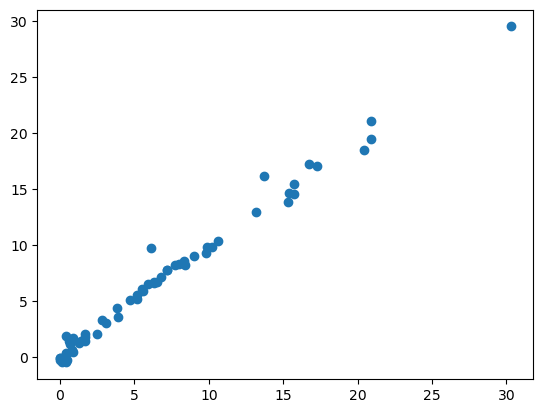

In [29]:
plt.scatter(y_test,y_predict)

## Lasso regression


In [30]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [31]:
lasso.fit(x_train_scaled,y_train)
y_predict = lasso.predict(x_test_scaled)
MAE = mean_absolute_error(y_test,y_predict)
r2value = r2_score(y_test,y_predict)

print("Mean Absolute Error:",MAE)
print("R squared value:",r2value)

Mean Absolute Error: 1.1331759949144087
R squared value: 0.9492020263112388


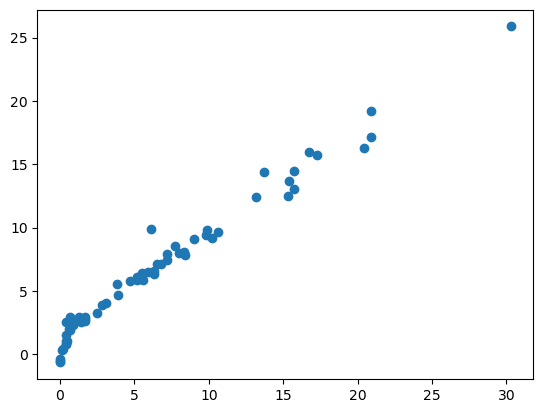

In [32]:
plt.scatter(y_test,y_predict)


## Ridge regression

In [33]:
from sklearn.linear_model import Ridge
rigde = Ridge()

In [34]:
rigde.fit(x_train_scaled,y_train)
y_predict = rigde.predict(x_test_scaled)
MAE = mean_absolute_error(y_test,y_predict)
r2value = r2_score(y_test,y_predict)

print("Mean Absolute Error:",MAE)
print("R squared value:",r2value)

Mean Absolute Error: 0.5642305340105677
R squared value: 0.9842993364555515


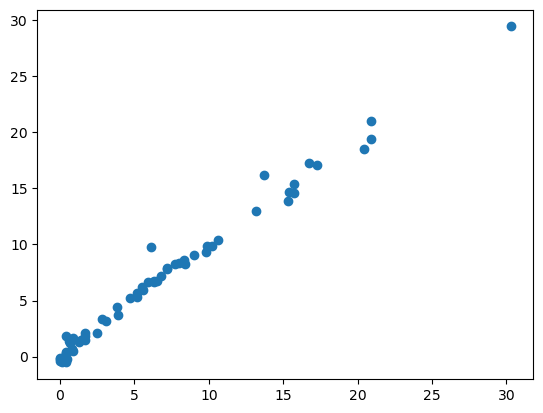

In [35]:
plt.scatter(y_test,y_predict)

## Elastic net


In [36]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

In [37]:
elasticnet.fit(x_train_scaled,y_train)
y_predict = elasticnet.predict(x_test_scaled)
MAE = mean_absolute_error(y_test,y_predict)
r2value = r2_score(y_test,y_predict)

print("Mean Absolute Error:",MAE)
print("R squared value:",r2value)

Mean Absolute Error: 1.8822353634896005
R squared value: 0.8753460589519703


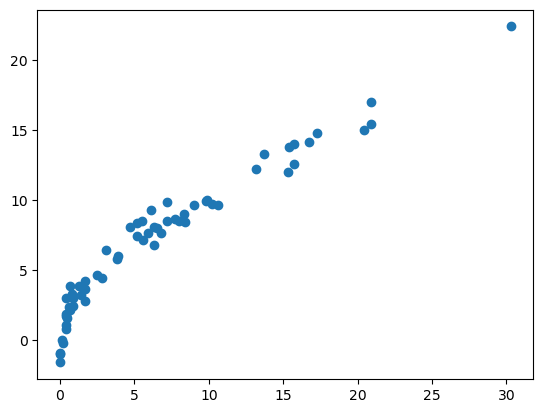

In [38]:
plt.scatter(y_test,y_predict)

## Cross validation

 Cross-validation in Machine Learning (ML) is a technique used to evaluate how well a model will perform on unseen data

## Lasso CV 

In [100]:
from sklearn.linear_model import LassoCV

In [101]:
lassocv = LassoCV(cv=5)

In [102]:
lassocv.fit(x_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [120]:
y_predic = lassocv.predict(x_test_scaled)

In [104]:
# let's see what alpha value it has selected 
lassocv.alpha_

np.float64(0.05725391318234408)

In [105]:
# see the what are the alpha values are try
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [109]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [108]:
print(len(lassocv.mse_path_))

100


In [118]:
len(x_test_scaled)

61

In [119]:
len(x_predic)

61

In [121]:
# caculating the error 
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predic)
score

0.9820946715928275

In [122]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)

In [123]:
ridgecv.fit(x_train_scaled,y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [124]:
y_predict = ridgecv.predict(x_test_scaled)

In [125]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predict)
print(score)

0.9842993364555515


In [126]:
ridgecv.alpha_

np.float64(1.0)

In [127]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [128]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)


In [129]:
elasticnetcv.fit(x_train_scaled,y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [130]:
y_predic = elasticnetcv.predict(x_test_scaled)

In [131]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predic)

In [132]:
print(score)

0.9814217587854942
